In [51]:
## Importing 
%matplotlib inline

import numpy as np
import pylab as pl
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy import visualization

pl.rcParams['image.origin'] = 'lower' # make images display right-side-up
pl.style.use('dark_background')

## choose directory. Should be fine since file is alreay here 
os.chdir("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 1\\AST3722-Fall-2021-09-29-21")

In [52]:
## 40 ms darks -- biases
biases = glob.glob("Darks\\dark_40ms*.FIT")
bias_timesearies = np.array([fits.getdata(fn) for fn in biases])
master_bias = np.median(bias_timesearies, axis=0) 
#master_bias

In [53]:
# 20 s darks
dark_20s = glob.glob("Darks\\dark_20s*.FIT")
dark_20s_timeseries = np.array([fits.getdata(fn) for fn in dark_20s])
master_dark_20s = np.median(dark_20s_timeseries, axis=0) 
#master_dark_20s

In [54]:
# 30 s darks
dark_30s = glob.glob("Darks\\dark_30s*.FIT")
dark_30s_timeseries = np.array([fits.getdata(fn) for fn in dark_30s])
master_dark_30s = np.median(dark_30s_timeseries, axis=0) 
#master_dark_30s

In [55]:
bias_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in biases]
mean_bias = np.mean(bias_timestream, axis=0)
stddev_bias = np.std(bias_timestream, axis=0)
readnoise = np.mean(stddev_bias)
del bias_timestream

In [56]:
mean_bias_noise = readnoise / np.sqrt(len(biases))
mean_bias_noise

6.321659545083941

## Flats

In [57]:
clear_flat = glob.glob("Twighlight Flats\\flat_15s_Clear*FIT")
I_flat = glob.glob("Twighlight Flats\\flat_10s_I*FIT")
B_flat = glob.glob("Twighlight Flats\\flat_15s_B*FIT")
V_flat = glob.glob("Twighlight Flats\\flat_15s_V*FIT")

In [58]:
#Clear, B , V , I
flat = [clear_flat, B_flat, V_flat, I_flat]
flat_timestream = []
mean_flat = []
bias_subtracted_flat = []
normed_flat = []

for i in range(4):
    flat_timestream.append([fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in flat[i]]) #*fits.getheader(x)['EGAIN']
    mean_flat.append(np.mean(flat_timestream[i], axis=0))
    bias_subtracted_flat.append(mean_flat[i] - mean_bias)
    normed_flat.append(bias_subtracted_flat[i]/bias_subtracted_flat[i].mean())
    
del flat_timestream

In [59]:
gain = fits.getheader("Twighlight Flats\\flat_15s_Clear001.FIT")['EGAIN']
flat_poisson_uncertainty = []
flat_singleframe_uncertainty = []
flat_total_uncertainty = []
normalized_mean_flat = []

for i in range(4):
    flat_poisson_uncertainty.append((bias_subtracted_flat[i])**0.5)
    flat_singleframe_uncertainty.append((flat_poisson_uncertainty[i]**2 + readnoise**2)**0.5)
    flat_total_uncertainty.append(((flat_singleframe_uncertainty[i]/np.sqrt(len(flat[i])))**2 + mean_bias_noise**2)**0.5)
    mean_of_flat = np.mean(bias_subtracted_flat[i])
    normalized_mean_flat.append(bias_subtracted_flat[i] / mean_of_flat)

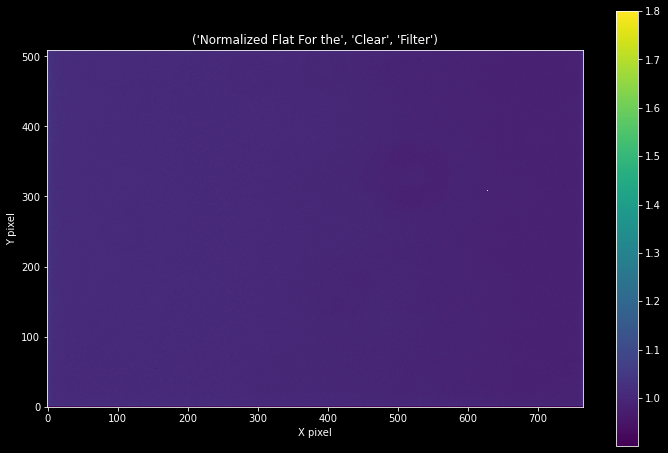

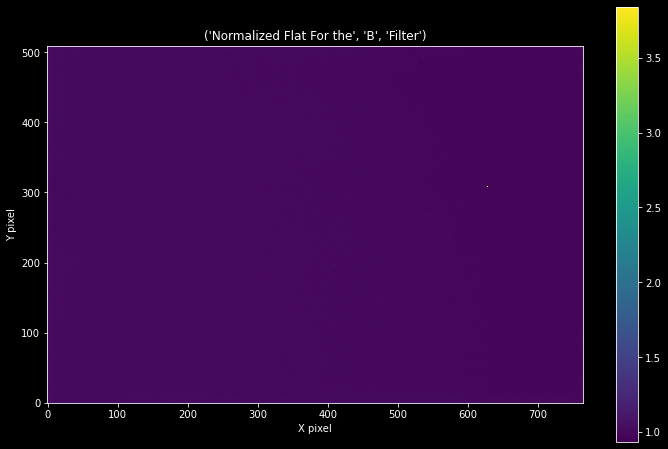

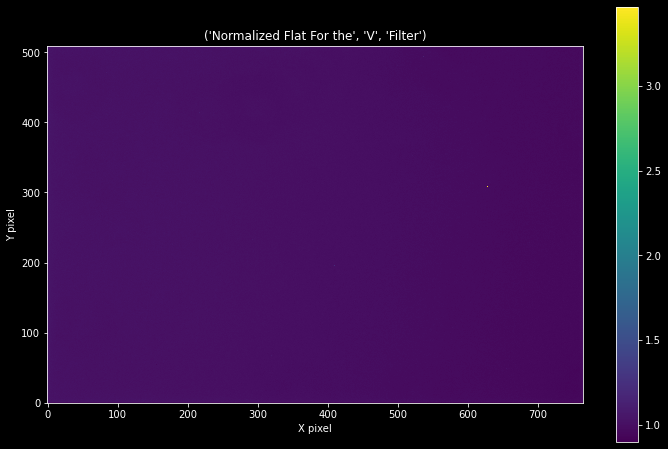

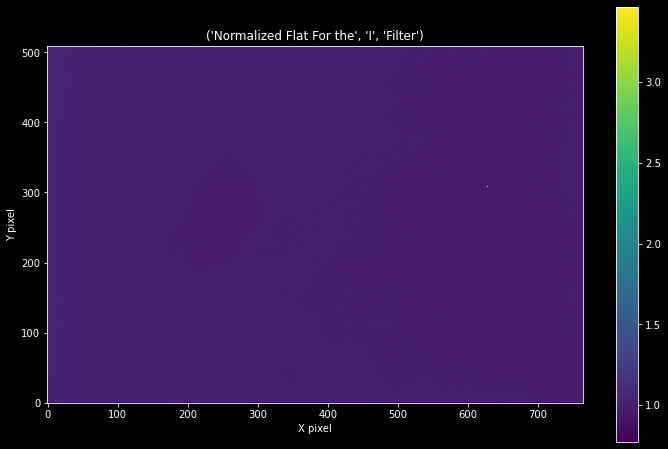

In [60]:
names = ["Clear", "B", "V", "I"]
for i in range(4):
    temp = 'Normalized Flat For the', names[i], 'Filter'
    pl.figure(figsize=(12,8))
    _=pl.imshow(normalized_mean_flat[i], origin='lower', interpolation='none')
    _=pl.colorbar()
    _=pl.title(temp)
    _=pl.xlabel("X pixel")
    _=pl.ylabel("Y pixel")

## Normalized Flats

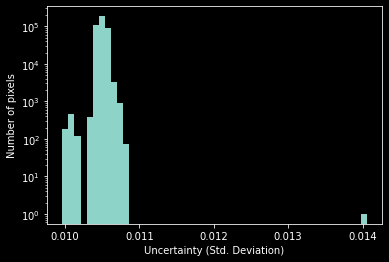

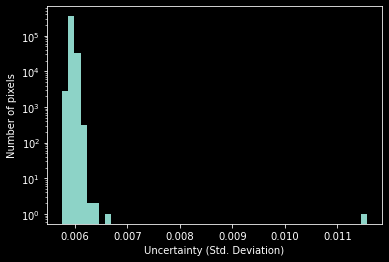

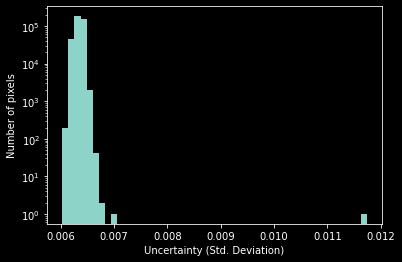

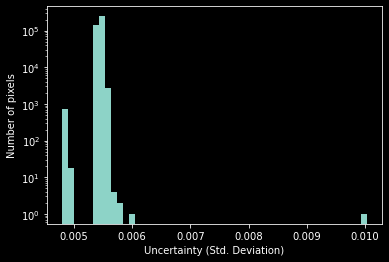

In [61]:
normalized_flat_uncertainty = []
for i in range(4):
    pl.figure()
    normalized_flat_uncertainty.append(flat_total_uncertainty[i] / mean_of_flat)
    pl.xlabel("Uncertainty (Std. Deviation)")
    pl.ylabel("Number of pixels")
    _=pl.hist(normalized_flat_uncertainty[i].ravel(), bins=50, log=True)


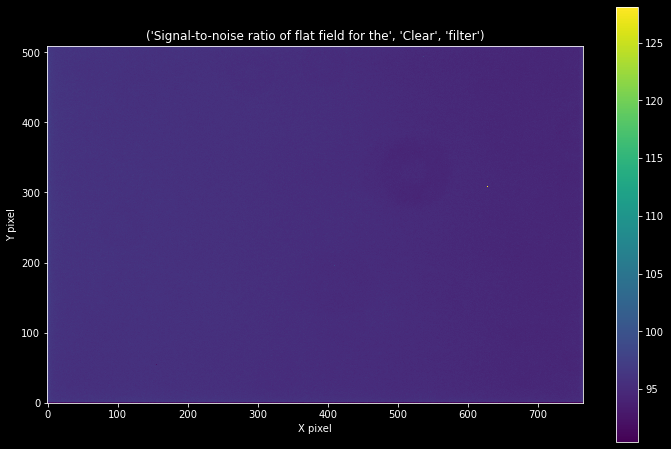

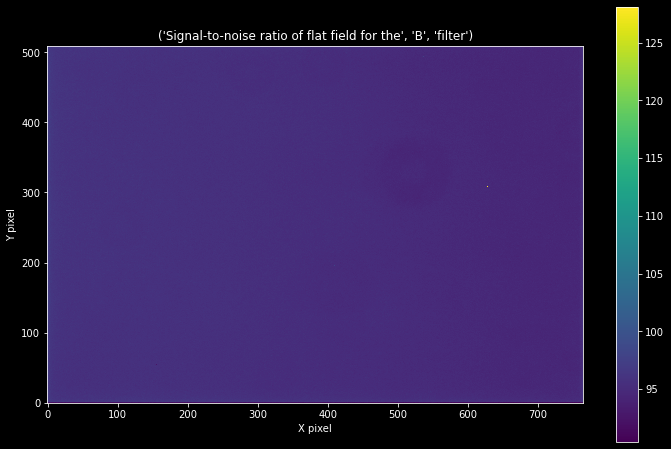

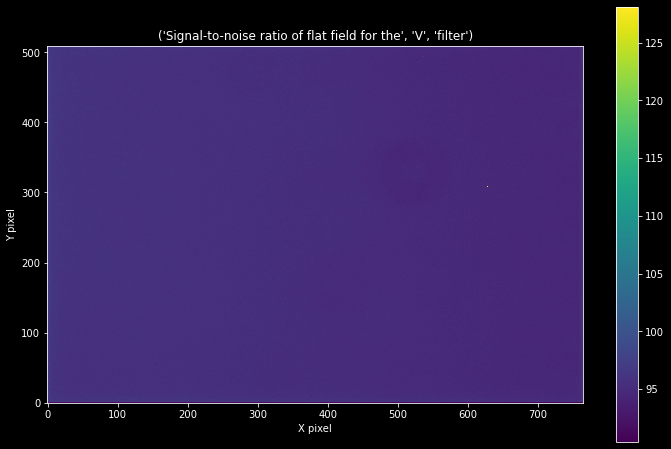

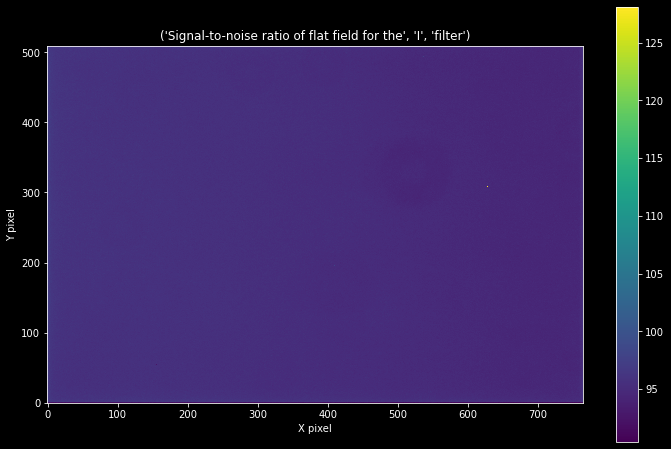

In [62]:
for i in range(4):
    temp = "Signal-to-noise ratio of flat field for the", names[i], "filter"
    pl.figure(figsize=(12,8))
    pl.imshow(normalized_mean_flat[0]/normalized_flat_uncertainty[0], origin='lower', interpolation='none')
    pl.title(temp)
    pl.colorbar()
    _=pl.xlabel("X pixel")
    _=pl.ylabel("Y pixel")

## Darks

In [63]:
biases = glob.glob("Darks\\dark_40ms*.FIT")
dark_40ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in biases]
average_40ms_dark = np.mean(dark_40ms, axis=0)
stddev_40ms_dark = np.std(dark_40ms, axis=0)
del dark_40ms

In [64]:
dark20s = glob.glob("Darks\\dark_20s*.FIT")
dark_20s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in dark20s]
average_20s_dark = np.mean(dark_20s, axis=0)
stddev_20s_dark = np.std(dark_20s, axis=0)
del dark_20s

In [65]:
dark30s = glob.glob("Darks\\dark_30s*.FIT")
dark_30s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in dark30s]
average_30s_dark = np.mean(dark_30s, axis=0)
stddev_30s_dark = np.std(dark_30s, axis=0)
del dark_30s

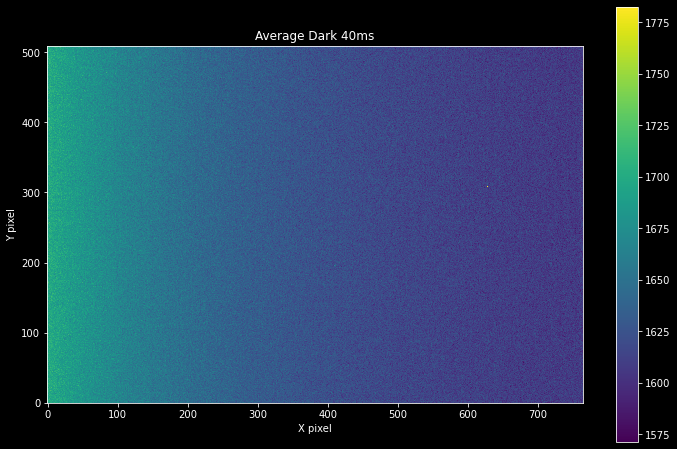

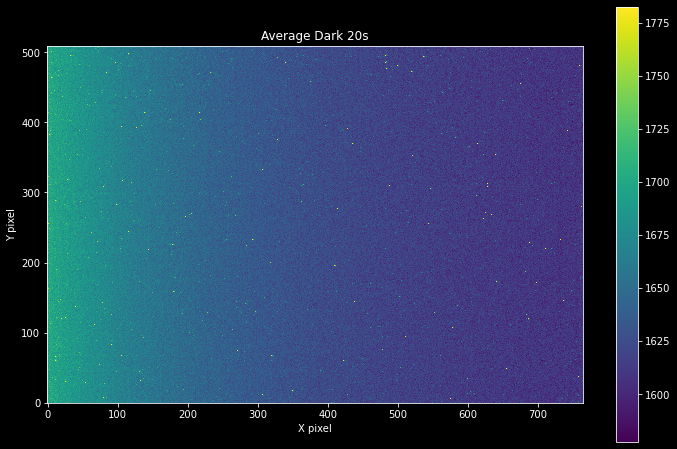

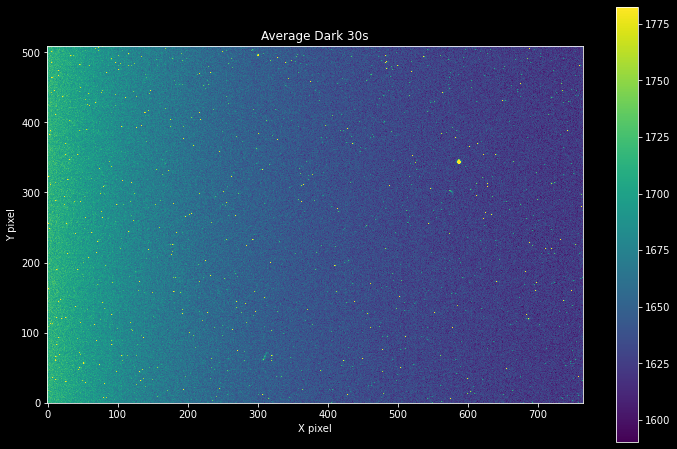

In [66]:
pl.figure(figsize=(12,8))
pl.imshow(average_40ms_dark, origin='lower', interpolation='none', vmax=1150*gain)
pl.colorbar()
_=pl.title("Average Dark 40ms")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

uncertainty_on_40ms_mean_dark = stddev_40ms_dark / np.sqrt(len(biases))

pl.figure(figsize=(12,8))
pl.imshow(average_20s_dark, origin='lower', interpolation='none', vmax=1150*gain)
pl.colorbar()
_=pl.title("Average Dark 20s")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

uncertainty_on_20s_mean_dark = stddev_20s_dark / np.sqrt(len(dark20s))

pl.figure(figsize=(12,8))
pl.imshow(average_30s_dark, origin='lower', interpolation='none', vmax=1150*gain)
pl.colorbar()
_=pl.title("Average Dark 30s")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

uncertainty_on_30s_mean_dark = stddev_30s_dark / np.sqrt(len(dark30s))

## M13

In [67]:
pwd

"C:\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 1\\AST3722-Fall-2021-09-29-21"

In [68]:
cd "C:\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 1\\AST3722-Fall-2021-09-29-21\\M13"

C:\Users\Sydnee O'Donnell\OneDrive\UF\Obs Tech 1\AST3722-Fall-2021-09-29-21\M13


In [44]:
#M13Filelist = ['M13_20s_B002.FIT', 'M13_20s_B003.FIT', 'M13_20s_B004.FIT', 'M13_20s_B005.FIT',
#                 'M13_20s_V001.FIT', 'M13_20s_V002.FIT', 'M13_20s_V003.FIT', 'M13_20s_V004.FIT', 'M13_20s_V005.FIT',
#                 'M13_20s_I001.FIT', 'M13_20s_I002.FIT', 'M13_20s_I003.FIT', 'M13_20s_I004.FIT', 'M13_20s_I005.FIT']
#
#M13Centers_X = [634, 634, 631, 628,
#               636, 636, 643, 643, 634,
#               632, 636, 636, 634, 634]
#M13Centers_Y = [412, 418, 423, 430,
#               383, 387, 392, 397, 401,
#               358, 362, 365, 370, 375] 

M13Filelist = ['M13_20s_B002.FIT', 'M13_20s_B003.FIT', 'M13_20s_B004.FIT', 'M13_20s_B005.FIT',
                'M13_20s_I001.FIT', 'M13_20s_I002.FIT', 'M13_20s_I003.FIT', 'M13_20s_I004.FIT', 'M13_20s_I005.FIT',
              'M13_20s_V001.FIT', 'M13_20s_V002.FIT', 'M13_20s_V003.FIT', 'M13_20s_V004.FIT', 'M13_20s_V005.FIT']

M13Centers_X = [634, 634, 631, 628,
               632, 636, 636, 634, 634,
               636, 636, 643, 643, 634]
M13Centers_Y = [412, 418, 423, 430,
               358, 362, 365, 370, 375,
               383, 387, 392, 397, 401] 

#Making 'M13_20s_B001.FIT' the reference frame.
refx, refy = 637, 410
M13_shift = [fits.getdata('M13_20s_B001.FIT')/fits.getheader('M13_20s_B001.FIT')[ 'EGAIN']]

for i in range(len(M13Filelist)):
    im = fits.getdata(M13Filelist[i])*fits.getheader(M13Filelist[i])[ 'EGAIN']
    dx = refx - M13Centers_X[i]
    dy = refy - M13Centers_Y[i]
    dx, dy = round(dx), round(dy)    
    im_shift = np.roll(im, dy, axis=0)
    im_shift = np.roll(im_shift, dx, axis=1)
    M13_shift.append(im_shift)
    #Saving the shifted images
    header = fits.getheader(M13Filelist[i])
    fh = fits.PrimaryHDU(data=im_shift, header=header) 
    fh.writeto('shifted_' + M13Filelist[i], overwrite=True)

header = fits.getheader('M13_20s_B001.FIT')
fh = fits.PrimaryHDU(data = M13_shift[0], header=header) 
fh.writeto('shifted_' + 'M13_20s_B001.FIT', overwrite=True)

In [45]:
M13_darksub = []
M13_darksub_uncertainty = []
M13_darksub_flattened = []
M13_darksub_flattened_uncertainty = []
num = 0

for i in range(len(M13Filelist)):
    if(i%3 == 0):
        num = num + 1
        #changes the flat filter
    M13_darksub.append(M13_shift[i] - average_40ms_dark)
    M13_darksub_uncertainty.append((M13_darksub[i] + readnoise**2 + uncertainty_on_20s_mean_dark**2)**0.5)
    M13_darksub_flattened.append( M13_darksub[i] / normalized_mean_flat[num])
    M13_darksub_flattened_uncertainty.append(((M13_darksub_uncertainty[i]**2 / M13_darksub[i]**2 +normalized_flat_uncertainty[0]**2 / normalized_mean_flat[num]**2) * M13_darksub_flattened[i]**2)**0.5)  
    SNR = M13_darksub_flattened[i] / M13_darksub_flattened_uncertainty[i]
   # pl.figure(figsize=(16,5))
    #SNR Images:
   # image = pl.subplot(1,2,1).imshow(SNR, origin='lower', interpolation='none', vmin=10, vmax=100)
   # _=pl.title("M13 SNR")
   # _=pl.xlabel("X pixel")
   # _=pl.ylabel("Y pixel")
   # pl.colorbar(image)
   # #Histogram:
   # _ = pl.subplot(1,2,2).hist(SNR.ravel(), bins=50, log=True)
   # _ = pl.xlabel("SNR")
   # _ = pl.ylabel("Number of pixels")
    
   # print(M13_darksub_flattened[i])
    
    header = fits.getheader(M13Filelist[i])

    fh = fits.PrimaryHDU(data = M13_darksub_flattened[i], header=header) 
    fh.writeto('darksub_flattened_'+ M13Filelist[i], overwrite=True)
    
    fh = fits.PrimaryHDU(data = M13_darksub_flattened_uncertainty[i], header=header) 
    fh.writeto('darksub_flattened_uncertainty_'+ M13Filelist[i], overwrite=True)

<ipython-input-45-76b5c8995559>:12: RuntimeWarning: invalid value encountered in sqrt
  M13_darksub_uncertainty.append((M13_darksub[i] + readnoise**2 + uncertainty_on_20s_mean_dark**2)**0.5)
<ipython-input-45-76b5c8995559>:14: RuntimeWarning: divide by zero encountered in true_divide
  M13_darksub_flattened_uncertainty.append(((M13_darksub_uncertainty[i]**2 / M13_darksub[i]**2 +normalized_flat_uncertainty[0]**2 / normalized_mean_flat[num]**2) * M13_darksub_flattened[i]**2)**0.5)
<ipython-input-45-76b5c8995559>:14: RuntimeWarning: invalid value encountered in multiply
  M13_darksub_flattened_uncertainty.append(((M13_darksub_uncertainty[i]**2 / M13_darksub[i]**2 +normalized_flat_uncertainty[0]**2 / normalized_mean_flat[num]**2) * M13_darksub_flattened[i]**2)**0.5)


IndexError: list index out of range

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


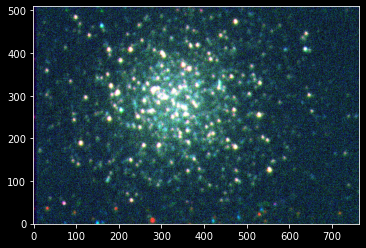

In [46]:
timeseries_M13_B = np.array([M13_darksub_flattened[0],
                             M13_darksub_flattened[1],
                             M13_darksub_flattened[2]])
timeseries_M13_V = np.array([M13_darksub_flattened[3],
                             M13_darksub_flattened[4],
                             M13_darksub_flattened[5]])
timeseries_M13_I = np.array([M13_darksub_flattened[6],
                             M13_darksub_flattened[7],
                             M13_darksub_flattened[8]])

timeseries_M13 = [timeseries_M13_B, timeseries_M13_V, timeseries_M13_I]

Bband_M13_median = np.median(timeseries_M13_B, axis = 0)
Vband_M13_median = np.median(timeseries_M13_V, axis = 0)
Iband_M13_median = np.median(timeseries_M13_I, axis = 0)

bslc = slice(360,460), slice(587,687)
vslc = slice(360,460), slice(587,687)
Islc = slice(360,460), slice(587,687)

minimum = 10
maximum = 99

norm_B = visualization.simple_norm(Bband_M13_median, 
                                   stretch = 'linear', 
                                   min_percent = 10, 
                                   max_percent = maximum)

norm_V = visualization.simple_norm(Vband_M13_median, 
                                   stretch = 'linear', 
                                   min_percent = 10, 
                                   max_percent = maximum)

norm_I = visualization.simple_norm(Iband_M13_median, 
                                   stretch = 'linear', 
                                   min_percent = 1, 
                                   max_percent = maximum)

M13_color = np.array([norm_I(Iband_M13_median),
                         norm_V(Vband_M13_median),
                         norm_B(Bband_M13_median)])


M13_color=M13_color.T.swapaxes(0,1)
M13_color[:,:,0] = np.roll(M13_color[:,:,0], 0, axis=0)
M13_color[:,:,0] = np.roll(M13_color[:,:,0], 0, axis=1)
#bslc3d = (bslc[0], bslc[1], slice(None))

pl.imshow(M13_color)

In [47]:
fh = fits.PrimaryHDU(data = Iband_M13_median, header=header) 
fh.writeto('darksub_flattened_M13_I', overwrite=True)

In [48]:
fh = fits.PrimaryHDU(data = Vband_M13_median, header=header) 
fh.writeto('darksub_flattened_M13_V', overwrite=True)

In [49]:
fh = fits.PrimaryHDU(data = Bband_M13_median, header=header) 
fh.writeto('darksub_flattened_M13_B', overwrite=True)

In [42]:
photon_noise_flat = []
total_noise_flat = []
average_flat_uncertainty = []
norm_flat_uncertainty = []
for i in range(3):
    photon_noise_flat.append(timeseries_M13[i]**0.5)
    total_noise_flat.append((photon_noise_flat[i]**2 + 
                        uncertainty_on_20s_mean_dark**2 +
                        readnoise**2)**0.5)
    average_flat_uncertainty.append(total_noise_flat[i] / np.sqrt(len(dark20s)))
    norm_flat_uncertainty.append(average_flat_uncertainty[i] / bias_subtracted_flat[i].mean())


<ipython-input-42-cd78e6d76db5>:6: RuntimeWarning: invalid value encountered in sqrt
  photon_noise_flat.append(timeseries_M13[i]**0.5)


In [72]:
photon_noise_estimate_M13 = []
total_noise_estimate_M13 = []
total_flat_noise_estimate_M13 = []
final_mean_M13_noise = []

for i in range(3):
    photon_noise_estimate_M13.append(timeseries_M13[i]**0.5)
    photon_noise_estimate_M13[i][np.isnan(photon_noise_estimate_M13[i])] = 0
    total_noise_estimate_M13.append((photon_noise_estimate_M13[i]**2 + 
                                      uncertainty_on_20s_mean_dark**2 +
                                      readnoise**2)**0.5)

    total_flat_noise_estimate_M13.append((((
        total_noise_estimate_M13[i]**2 /
        timeseries_M13[i]**2)
        + (norm_flat_uncertainty[i]**2 / normed_flat[i]**2)) * 
        timeseries_M13[i]**2)**0.5)
    final_mean_M13_noise.append(((
        total_flat_noise_estimate_M13[i]**2).sum(axis=0) /
        total_flat_noise_estimate_M13[i].shape[0]**2)**0.5)
    
    pleiades_clear_darksub_flattened_uncertainty = ((
    pleiades_clear_darksub_uncertainty**2 / pleiades_clear_darksub**2 +
    normalized_flat_uncertainty**2 / normalized_mean_clear_flat**2
) * pleiades_clear_darksub_flattened**2)**0.5
    
    fh = fits.PrimaryHDU(data = final_mean_M13_noise[i], header=header) 
    fh.writeto('darksub_flattened_uncertainty_M13' + M13Filelist[i], overwrite=True)

<ipython-input-72-5bf19c4aa84b>:7: RuntimeWarning: invalid value encountered in sqrt
  photon_noise_estimate_M13.append(timeseries_M13[i]**0.5)
<ipython-input-72-5bf19c4aa84b>:14: RuntimeWarning: divide by zero encountered in true_divide
  total_noise_estimate_M13[i]**2 /
<ipython-input-72-5bf19c4aa84b>:13: RuntimeWarning: invalid value encountered in multiply
  total_flat_noise_estimate_M13.append((((


In [44]:
total_counts_M13_B = Bband_M13_median.sum()
total_counts_M13_V = Vband_M13_median.sum()
total_counts_M13_I = Iband_M13_median.sum()

print(f"Photon Counts: B={total_counts_M13_B:0.3g} photons, V={total_counts_M13_V:0.3g} photons, I={total_counts_M13_I:0.3g} photons,")
      
rate_B_M13 = total_counts_M13_B / 0.04
rate_V_M13 = total_counts_M13_V / 0.04
rate_I_M13 = total_counts_M13_I / 0.04

print(f"Photon Rates: B={rate_B_M13:0.3g} ph/s, V={rate_V_M13:0.3g} ph/s, I={rate_I_M13:0.3g} ph/s,")


Photon Counts: B=3.17e+07 photons, V=3.17e+07 photons, I=3.77e+07 photons,
Photon Rates: B=7.91e+08 ph/s, V=7.93e+08 ph/s, I=9.42e+08 ph/s,


In [45]:
uncertainty_cts_B_M13 = np.nansum(final_mean_M13_noise[0]**2)**0.5
uncertainty_cts_V_M13 = np.nansum(final_mean_M13_noise[1]**2)**0.5
uncertainty_cts_I_M13 = np.nansum(final_mean_M13_noise[2]**2)**0.5

uncertainty_rate_B_M13 = uncertainty_cts_B_M13 / 0.04
uncertainty_rate_V_M13 = uncertainty_cts_V_M13 / 0.04
uncertainty_rate_I_M13 = uncertainty_cts_I_M13 / 0.04

print(f"M13 Flux I Band ={rate_I_M13:12.3g} +/- {uncertainty_rate_I_M13:12.3g} ph/s ( SNR ={rate_I_M13/uncertainty_rate_I_M13:10.3g})")
print(f"M13 Flux V Band ={rate_V_M13:12.3g} +/- {uncertainty_rate_V_M13:12.3g} ph/s ( SNR ={rate_V_M13/uncertainty_rate_V_M13:10.3g})")
print(f"M13 Flux B Band ={rate_B_M13:12.3g} +/- {uncertainty_rate_B_M13:12.3g} ph/s ( SNR ={rate_B_M13/uncertainty_rate_B_M13:10.3g})")


M13 Flux I Band =    9.42e+08 +/-     1.67e+05 ph/s ( SNR =  5.65e+03)
M13 Flux V Band =    7.93e+08 +/-     1.64e+05 ph/s ( SNR =  4.85e+03)
M13 Flux B Band =    7.91e+08 +/-     1.63e+05 ph/s ( SNR =  4.86e+03)


## M57

In [46]:
pwd

"C:\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 1\\AST3722-Fall-2021-09-29-21\\M13"

In [49]:
cd "C:\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 1\\AST3722-Fall-2021-09-29-21\\M57"

C:\Users\Sydnee O'Donnell\OneDrive\UF\Obs Tech 1\AST3722-Fall-2021-09-29-21\M57


In [50]:
#M57Filelist = ['M57_30s_B002.FIT', 'M57_30s_B003.FIT', 'M57_30s_B004.FIT', 'M57_30s_B005.FIT',
#                 'M57_30s_V001.FIT', 'M57_30s_V002.FIT', 'M57_30s_V003.FIT', 'M57_30s_V004.FIT', 'M57_30s_V005.FIT',
#                 'M57_30s_I001.FIT', 'M57_30s_I002.FIT', 'M57_30s_I003.FIT', 'M57_30s_I004.FIT', 'M57_30s_I005.FIT']
#
#M57Centers_X = [441.5, 445.6, 447.9, 450.2,
#               416.7, 420.1, 423.0, 425.3, 428.2,
#               398.3, 402.9, 404.6, 406.9, 412.7]
#M57Centers_Y = [175.6, 179.7, 188.3, 192.4,
#               170.4, 166.9, 167.5, 168.1, 176.2,
#               123.4, 129.2, 128.6, 131.5, 148.9] 

M57Filelist = ['M57_30s_B002.FIT', 'M57_30s_B003.FIT', 'M57_30s_B004.FIT', 'M57_30s_B005.FIT',
                 'M57_30s_I001.FIT', 'M57_30s_I002.FIT', 'M57_30s_I003.FIT', 'M57_30s_I004.FIT', 'M57_30s_I005.FIT',
              'M57_30s_V001.FIT', 'M57_30s_V002.FIT', 'M57_30s_V003.FIT', 'M57_30s_V004.FIT', 'M57_30s_V005.FIT']
M57Centers_X = [441.5, 445.6, 447.9, 450.2,
               398.3, 402.9, 404.6, 406.9, 412.7,
               416.7, 420.1, 423.0, 425.3, 428.2]
M57Centers_Y = [175.6, 179.7, 188.3, 192.4,
                123.4, 129.2, 128.6, 131.5, 148.9,
               170.4, 166.9, 167.5, 168.1, 176.2] 


#Making 'M13_20s_B001.FIT' the reference frame.
refx, refy = 438, 180
M57_shift = [fits.getdata('M57_30s_B001.FIT')*fits.getheader('M57_30s_B001.FIT')[ 'EGAIN']]

for i in range(len(M57Filelist)):
    im = fits.getdata(M57Filelist[i])*fits.getheader(M57Filelist[i])[ 'EGAIN']
    dx = refx - M57Centers_X[i]
    dy = refy - M57Centers_Y[i]
    dx, dy = round(dx), round(dy)    
    im_shift = np.roll(im, dy, axis=0)
    im_shift = np.roll(im_shift, dx, axis=1)
    M57_shift.append(im_shift)
    #Saving the shifted images
    header = fits.getheader(M57Filelist[i])
    fh = fits.PrimaryHDU(data=im_shift, header=header) 
    fh.writeto('shifted_' + M57Filelist[i], overwrite=True)

header = fits.getheader('M57_30s_B001.FIT')
fh = fits.PrimaryHDU(data = M57_shift[0], header=header) 
fh.writeto('shifted_' + 'M57_30s_B001.FIT', overwrite=True)

<ipython-input-51-cc351c0027e3>:14: RuntimeWarning: divide by zero encountered in true_divide
  M57_darksub_flattened_uncertainty.append(((M57_darksub_uncertainty[i]**2 / M57_darksub[i]**2 +normalized_flat_uncertainty[0]**2 / normalized_mean_flat[num]**2) * M57_darksub_flattened[i]**2)**0.5)
<ipython-input-51-cc351c0027e3>:14: RuntimeWarning: invalid value encountered in multiply
  M57_darksub_flattened_uncertainty.append(((M57_darksub_uncertainty[i]**2 / M57_darksub[i]**2 +normalized_flat_uncertainty[0]**2 / normalized_mean_flat[num]**2) * M57_darksub_flattened[i]**2)**0.5)


IndexError: list index out of range

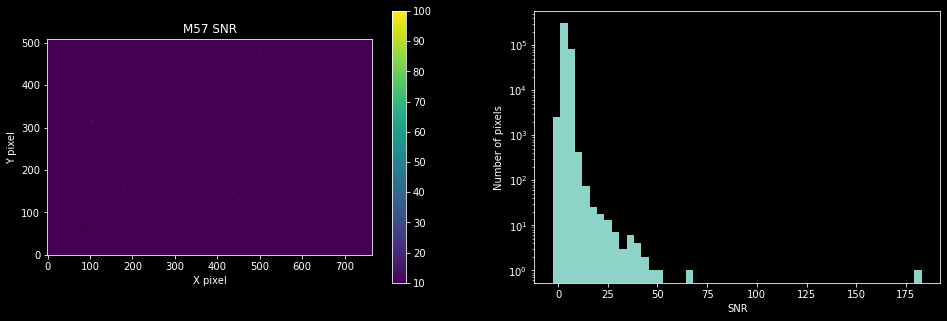

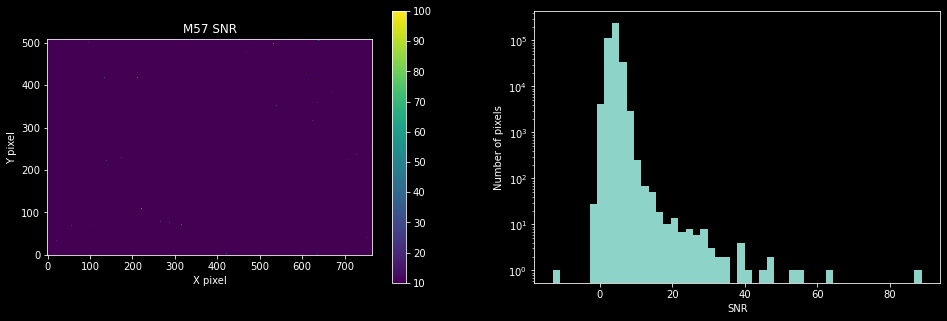

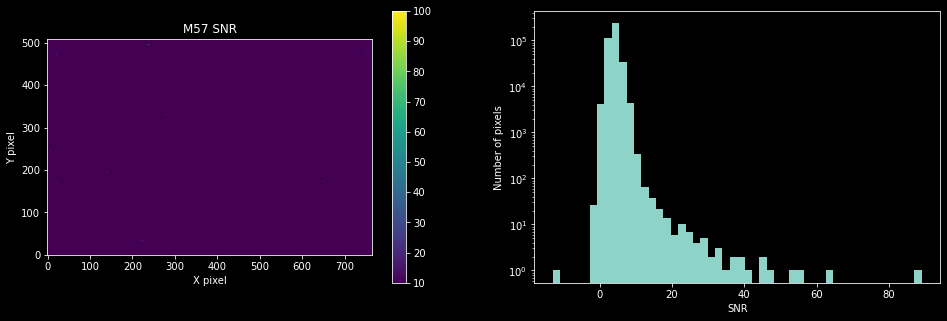

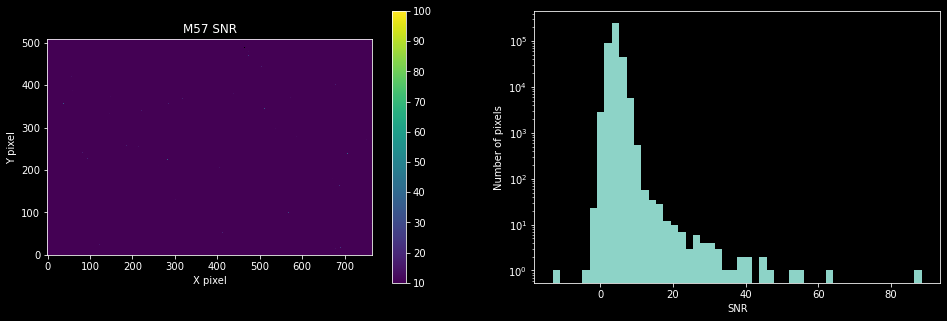

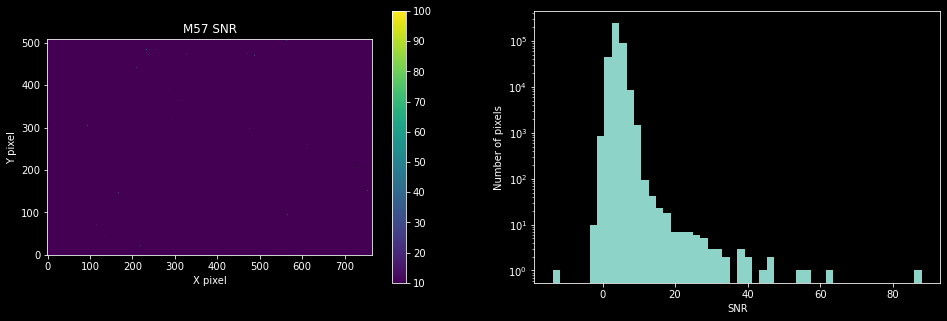

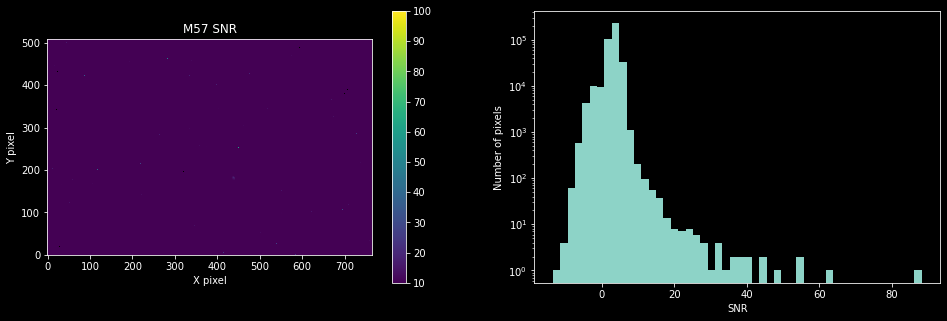

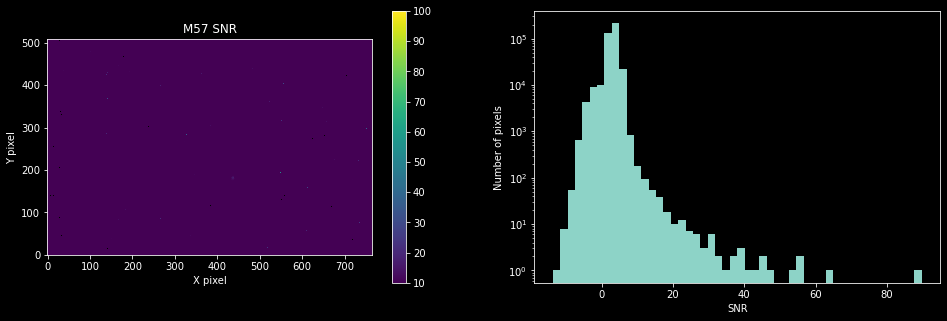

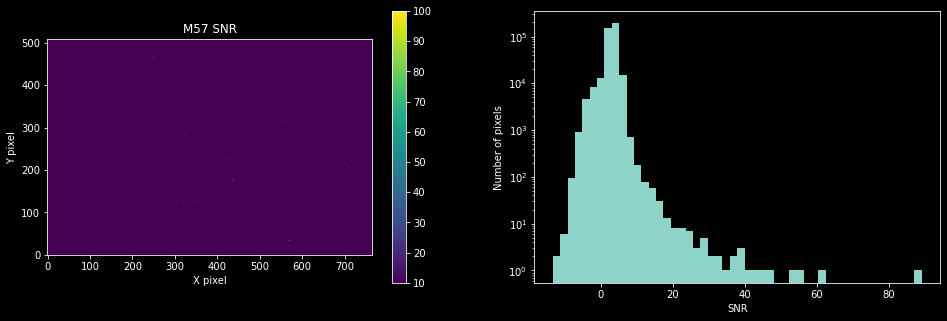

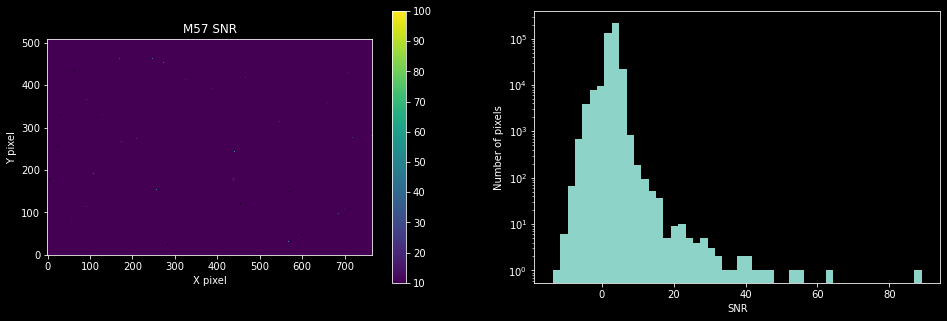

In [51]:
M57_darksub = []
M57_darksub_uncertainty = []
M57_darksub_flattened = []
M57_darksub_flattened_uncertainty = []
num = 0

for i in range(len(M57_shift)):
    if(i%3 == 0):
        num = num + 1
        #changes the flat filter
    M57_darksub.append(M57_shift[i] - average_40ms_dark)
    M57_darksub_uncertainty.append((M57_darksub[i] + readnoise**2 + uncertainty_on_30s_mean_dark**2)**0.5)
    M57_darksub_flattened.append( M57_darksub[i] / normalized_mean_flat[num])
    M57_darksub_flattened_uncertainty.append(((M57_darksub_uncertainty[i]**2 / M57_darksub[i]**2 +normalized_flat_uncertainty[0]**2 / normalized_mean_flat[num]**2) * M57_darksub_flattened[i]**2)**0.5)  
    SNR = M57_darksub_flattened[i] / M57_darksub_flattened_uncertainty[i]
    pl.figure(figsize=(16,5))
    #SNR Images:
    image = pl.subplot(1,2,1).imshow(SNR, origin='lower', interpolation='none', vmin=10, vmax=100)
    _=pl.title("M57 SNR")
    _=pl.xlabel("X pixel")
    _=pl.ylabel("Y pixel")
    pl.colorbar(image)
    #Histogram:
    _ = pl.subplot(1,2,2).hist(SNR.ravel(), bins=50, log=True)
    _ = pl.xlabel("SNR")
    _ = pl.ylabel("Number of pixels")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


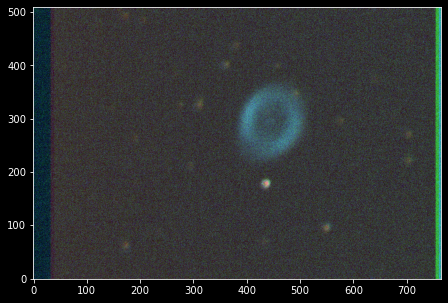

In [52]:
timeseries_M57_B = np.array([M57_darksub_flattened[0],
                             M57_darksub_flattened[1],
                             M57_darksub_flattened[2]])
timeseries_M57_V = np.array([M57_darksub_flattened[3],
                             M57_darksub_flattened[4],
                             M57_darksub_flattened[5]])
timeseries_M57_I = np.array([M57_darksub_flattened[6],
                             M57_darksub_flattened[7],
                             M57_darksub_flattened[8]])

timeseries_M57 = [timeseries_M57_B, timeseries_M57_V, timeseries_M57_I]

Bband_M57_median = np.median(timeseries_M57_B, axis = 0)
Vband_M57_median = np.median(timeseries_M57_V, axis = 0)
Iband_M57_median = np.median(timeseries_M57_I, axis = 0)


minimum = 0.5
maximum = 100

norm_B = visualization.simple_norm(Bband_M57_median, 
                                   stretch = 'linear', 
                                   min_percent = minimum,
                                   max_percent = maximum)

norm_V = visualization.simple_norm(Vband_M57_median, 
                                   stretch = 'linear', 
                                   min_percent = minimum, 
                                   max_percent = maximum)

norm_I = visualization.simple_norm(Iband_M57_median, 
                                   stretch = 'linear', 
                                   min_percent = minimum, 
                                   max_percent = 100)

M57_color = np.array([norm_I(Iband_M57_median),
                         norm_V(Vband_M57_median),
                         norm_B(Bband_M57_median)])


M57_color=M57_color.T.swapaxes(0,1)
M57_color[:,:,0] = np.roll(M57_color[:,:,0], 0, axis=0)
M57_color[:,:,0] = np.roll(M57_color[:,:,0], 0, axis=1)

pl.figure(figsize=(15,5))
pl.imshow(M57_color)

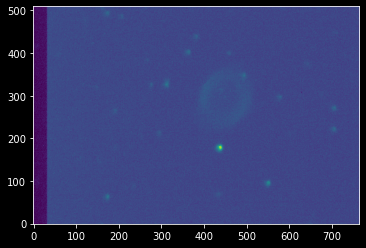

In [53]:
pl.imshow(Iband_M57_median, norm=norm_I)

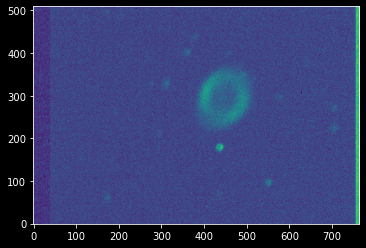

In [54]:
pl.imshow(Vband_M57_median, norm=norm_V)

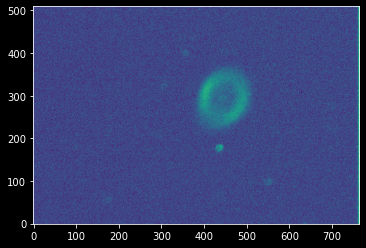

In [55]:
pl.imshow(Bband_M57_median, norm=norm_B)

In [56]:
photon_noise_flat = []
total_noise_flat = []
average_flat_uncertainty = []
norm_flat_uncertainty = []
for i in range(3):
    photon_noise_flat.append(timeseries_M57[i]**0.5)
    total_noise_flat.append((photon_noise_flat[i]**2 + 
                        uncertainty_on_30s_mean_dark**2 +
                        readnoise**2)**0.5)
    average_flat_uncertainty.append(total_noise_flat[i] / np.sqrt(len(dark30s)))
    norm_flat_uncertainty.append(average_flat_uncertainty[i] / bias_subtracted_flat[i].mean())

<ipython-input-56-736cdd389696>:6: RuntimeWarning: invalid value encountered in sqrt
  photon_noise_flat.append(timeseries_M57[i]**0.5)


In [57]:
photon_noise_estimate_M57 = []
total_noise_estimate_M57 = []
total_flat_noise_estimate_M57 = []
final_mean_M57_noise = []

for i in range(3):
    photon_noise_estimate_M57.append(timeseries_M57[i]**0.5)
    photon_noise_estimate_M57[i][np.isnan(photon_noise_estimate_M57[i])] = 0
    total_noise_estimate_M57.append((photon_noise_estimate_M57[i]**2 + 
                                      uncertainty_on_30s_mean_dark**2 +
                                      readnoise**2)**0.5)

    total_flat_noise_estimate_M57.append((((
        total_noise_estimate_M57[i]**2 /
        timeseries_M57[i]**2)
        + (norm_flat_uncertainty[i]**2 / normed_flat[i]**2)) * 
        timeseries_M57[i]**2)**0.5)
    final_mean_M57_noise.append(((
        total_flat_noise_estimate_M57[i]**2).sum(axis=0) /
        total_flat_noise_estimate_M57[i].shape[0]**2)**0.5)


<ipython-input-57-c5bc04a9c5ee>:7: RuntimeWarning: invalid value encountered in sqrt
  photon_noise_estimate_M57.append(timeseries_M57[i]**0.5)
<ipython-input-57-c5bc04a9c5ee>:14: RuntimeWarning: divide by zero encountered in true_divide
  total_noise_estimate_M57[i]**2 /
<ipython-input-57-c5bc04a9c5ee>:13: RuntimeWarning: invalid value encountered in multiply
  total_flat_noise_estimate_M57.append((((


In [58]:
total_counts_M57_B = Bband_M57_median.sum()
total_counts_M57_V = Vband_M57_median.sum()
total_counts_M57_I = Iband_M57_median.sum()

print(f"Photon Counts: B={total_counts_M57_B:0.3g} photons, V={total_counts_M57_V:0.3g} photons, I={total_counts_M57_I:0.3g} photons,")
      
rate_B_M57 = total_counts_M57_B / 0.04
rate_V_M57 = total_counts_M57_V / 0.04
rate_I_M57 = total_counts_M57_I / 0.04

print(f"Photon Rates: B={rate_B_M57:0.3g} ph/s, V={rate_V_M57:0.3g} ph/s, I={rate_I_M57:0.3g} ph/s,")


Photon Counts: B=2.71e+07 photons, V=2.57e+07 photons, I=2e+07 photons,
Photon Rates: B=6.76e+08 ph/s, V=6.43e+08 ph/s, I=5e+08 ph/s,


In [59]:
uncertainty_cts_B_M57 = np.nansum(final_mean_M57_noise[0]**2)**0.5
uncertainty_cts_V_M57 = np.nansum(final_mean_M57_noise[1]**2)**0.5
uncertainty_cts_I_M57 = np.nansum(final_mean_M57_noise[2]**2)**0.5

uncertainty_rate_B_M57 = uncertainty_cts_B_M57 / 0.04
uncertainty_rate_V_M57 = uncertainty_cts_V_M57 / 0.04
uncertainty_rate_I_M57 = uncertainty_cts_I_M57 / 0.04

print(f"M57 Flux I Band ={rate_I_M57:12.3g} +/- {uncertainty_rate_I_M57:12.3g} ph/s ( SNR ={rate_I_M57/uncertainty_rate_I_M57:10.3g})")
print(f"M57 Flux V Band ={rate_V_M57:12.3g} +/- {uncertainty_rate_V_M57:12.3g} ph/s ( SNR ={rate_V_M57/uncertainty_rate_V_M57:10.3g})")
print(f"M57 Flux B Band ={rate_B_M57:12.3g} +/- {uncertainty_rate_B_M57:12.3g} ph/s ( SNR ={rate_B_M57/uncertainty_rate_B_M57:10.3g})")


M57 Flux I Band =       5e+08 +/-      5.3e+05 ph/s ( SNR =       944)
M57 Flux V Band =    6.43e+08 +/-     5.31e+05 ph/s ( SNR =  1.21e+03)
M57 Flux B Band =    6.76e+08 +/-     4.89e+05 ph/s ( SNR =  1.38e+03)
